### ML Model Exploration & Interpretation Using Dalex
+ Dalex : moDel Agnostic Language for Exploration and eXplanation


#### Installation
+ pip install dalex

#### Components
+ Explanation
+ Fairness Detection
+ Arena
+ Datasets

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Metrics
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,confusion_matrix
from sklearn.metrics import f1_score

In [3]:
!pip install dalex plotly

In [5]:
# Load Data
df = pd.read_csv("bank-additional-full_encoded.csv")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
# Shape
df.shape

(41188, 21)

In [8]:
# Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
Xfeatures = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',]]
ylabels = df['y']

In [12]:
# Class Distribution
df['y'].value_counts().div(df.shape[0]).mul(100)

0    88.734583
1    11.265417
Name: y, dtype: float64

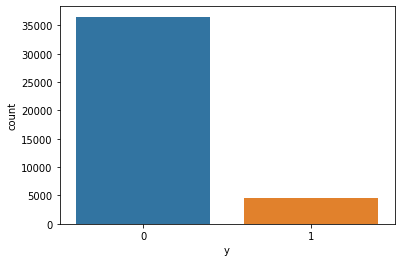

In [13]:
sns.countplot(x='y',data=df)

In [14]:
# Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

In [15]:
# Build Pipeline
pipe_base = Pipeline(steps=[('std_scaler',StandardScaler()),('dummy',DummyClassifier())])
pipe_lr = Pipeline(steps=[('std_scaler',StandardScaler()),('lr',LogisticRegression())])
pipe_dt = Pipeline(steps=[('std_scaler',StandardScaler()),('dt',DecisionTreeClassifier())])

In [16]:
# Training
# Base Model
pipe_base.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('dummy', DummyClassifier())])

In [17]:
# Accuracy of Base Model
pipe_base.score(x_test,y_test)

0.8917212915756252

In [18]:
# Training
# LR Model
pipe_lr.fit(x_train,y_train)

# DT Model
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier())])

In [20]:
# Accuracy of Base Model
print("LR:",pipe_lr.score(x_test,y_test))
print("DT:",pipe_dt.score(x_test,y_test))

LR: 0.9105770008901837
DT: 0.8873512988589464


### Model Explanation

In [21]:
import dalex as dx

In [22]:
# Methods
dir(dx)

['Arena',
 'Aspect',
 'Explainer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'datasets',
 'fairness']

In [23]:
# Explainer Instance
# Model
exp = dx.Explainer(pipe_lr,x_train,y_train)

Preparation of a new explainer is initiated

  -> data              : 28831 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 28831 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f4ddf0758c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00113, mean = 0.115, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 4.35e-07, max = 0.994
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
# Model Performance
exp.model_performance()

,recall,precision,f1,accuracy,auc
LogisticRegression,0.422774,0.672771,0.519249,0.91034,0.929601


In [25]:
# Model Performance
exp.model_performance().result

,recall,precision,f1,accuracy,auc
LogisticRegression,0.422774,0.672771,0.519249,0.91034,0.929601


In [26]:
# Variable/Feature Importance : Features contributions to the model
exp.model_parts()

,variable,dropout_loss,label
0,loan,0.071564,LogisticRegression
1,marital,0.071625,LogisticRegression
2,age,0.071645,LogisticRegression
3,_full_model_,0.071673,LogisticRegression
4,day_of_week,0.071702,LogisticRegression
5,housing,0.071718,LogisticRegression
6,job,0.071718,LogisticRegression
7,default,0.071754,LogisticRegression
8,campaign,0.071894,LogisticRegression
9,education,0.071958,LogisticRegression


In [27]:
# Model Variable Importance via Plot
exp.model_parts().plot()

In [28]:
# Model Profile
exp.model_profile()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:01<00:00, 17.84it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,age,LogisticRegression,17.000,0.113319,0
1,age,LogisticRegression,17.810,0.113552,0
2,age,LogisticRegression,18.620,0.113785,0
3,age,LogisticRegression,19.430,0.114018,0
4,age,LogisticRegression,20.240,0.114252,0
...,...,...,...,...,...
2015,nr.employed,LogisticRegression,5217.520,0.141947,0
2016,nr.employed,LogisticRegression,5220.165,0.142478,0
2017,nr.employed,LogisticRegression,5222.810,0.143010,0
2018,nr.employed,LogisticRegression,5225.455,0.143544,0


In [29]:
# Plot Model Profile
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:00<00:00, 21.27it/s]


In [30]:
# Model Diagnostics
exp.model_diagnostics().result 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_hat,residuals,abs_residuals,label,ids
28383,38,4,0,1,0,0,0,1,8,3,113,1,999,0,0,-1.8,93.075,-47.1,1.435,5099.1,0,0.091606,-0.091606,0.091606,LogisticRegression,1
24811,29,2,1,6,0,1,0,1,5,1,224,1,999,0,0,-0.1,93.200,-42.0,4.153,5195.8,0,0.049450,-0.049450,0.049450,LogisticRegression,2
40214,38,2,0,1,0,0,0,0,2,1,5,1,999,1,1,-1.7,94.215,-40.3,0.876,4991.6,0,0.065514,-0.065514,0.065514,LogisticRegression,3
22269,49,2,3,6,0,0,0,1,3,3,1532,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,1,0.924067,0.075933,0.075933,LogisticRegression,4
7905,53,2,2,6,1,0,0,0,1,0,53,2,999,0,0,1.4,94.465,-41.8,4.865,5228.1,0,0.009210,-0.009210,0.009210,LogisticRegression,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,29,2,0,6,0,0,0,1,0,2,12,5,999,0,0,-1.8,92.893,-46.2,1.281,5099.1,0,0.027510,-0.027510,0.027510,LogisticRegression,28827
13927,35,2,1,6,0,0,0,1,2,4,60,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1,0,0.012872,-0.012872,0.012872,LogisticRegression,28828
919,32,1,1,1,0,1,0,0,0,2,180,2,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0,0.014172,-0.014172,0.014172,LogisticRegression,28829
38467,33,2,1,1,0,1,0,1,4,0,61,2,6,2,1,-3.4,92.431,-26.9,0.731,5017.5,0,0.560529,-0.560529,0.560529,LogisticRegression,28830


In [32]:
### Make A Prediction
ex1 = x_test.iloc[7]

In [33]:
ex1

age                 38.000
job                  2.000
marital              1.000
education            6.000
default              0.000
housing              1.000
loan                 0.000
contact              1.000
month                7.000
day_of_week          3.000
duration           420.000
campaign             1.000
pdays              999.000
previous             0.000
poutcome             0.000
emp.var.rate        -1.800
cons.price.idx      93.369
cons.conf.idx      -34.800
euribor3m            0.643
nr.employed       5008.700
Name: 39312, dtype: float64

In [35]:
# Expected Prediction
y_test.iloc[7]

1

In [36]:
# Model Prediction
print("LR:",pipe_lr.predict([ex1]))
print("DT:",pipe_dt.predict([ex1]))

LR: [1]
DT: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
### Requirements
+ dataframe*

In [37]:
ex1

age                 38.000
job                  2.000
marital              1.000
education            6.000
default              0.000
housing              1.000
loan                 0.000
contact              1.000
month                7.000
day_of_week          3.000
duration           420.000
campaign             1.000
pdays              999.000
previous             0.000
poutcome             0.000
emp.var.rate        -1.800
cons.price.idx      93.369
cons.conf.idx      -34.800
euribor3m            0.643
nr.employed       5008.700
Name: 39312, dtype: float64

In [38]:
sample = pd.DataFrame(ex1).T

In [39]:
sample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39312,38.0,2.0,1.0,6.0,0.0,1.0,0.0,1.0,7.0,3.0,420.0,1.0,999.0,0.0,0.0,-1.8,93.369,-34.8,0.643,5008.7


In [40]:
# Prediction
exp.predict(sample)

array([0.61137558])

In [41]:
round(0.61137558)

1

In [42]:
# Predict Parts
explanation = exp.predict_parts(sample)

In [43]:
explanation.result

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,1,intercept,0.114529,0.114529,1.0,21,LogisticRegression
1,emp.var.rate,-1.8,emp.var.rate = -1.8,0.245652,0.131123,1.0,20,LogisticRegression
2,cons.conf.idx,-34.8,cons.conf.idx = -34.8,0.298880,0.053228,1.0,19,LogisticRegression
3,duration,420.0,duration = 420.0,0.442921,0.144040,1.0,18,LogisticRegression
4,euribor3m,0.643,euribor3m = 0.643,0.556812,0.113892,1.0,17,LogisticRegression
5,month,7.0,month = 7.0,0.634289,0.077477,1.0,16,LogisticRegression
6,nr.employed,5009.0,nr.employed = 5009.0,0.537440,-0.096849,-1.0,15,LogisticRegression
7,pdays,999.0,pdays = 999.0,0.523451,-0.013989,-1.0,14,LogisticRegression
8,contact,1.0,contact = 1.0,0.581087,0.057637,1.0,13,LogisticRegression
9,cons.price.idx,93.37,cons.price.idx = 93.37,0.517339,-0.063748,-1.0,12,LogisticRegression


In [44]:
# Plot Explanation of Prediction
explanation.plot()

In [45]:
# Prediction Profile
pred_profile = exp.predict_profile(sample)

Calculating ceteris paribus: 100%|██████████| 20/20 [00:00<00:00, 71.87it/s]


In [46]:
pred_profile.plot()

In [47]:
### Thanks For Your Time
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)